## Prepare Problem
Diabetes mellitus is a leading cause of mortality and reduced life expectancy.The prevalence of diabetes has increased in recent decades in most other developed and developing countries. In 2019, diabetes was the ninth leading cause of death with an estimated 1.5 million deaths directly caused by diabetes. Particularly, diabetes is a rapidly growing health challenge and potential epidemic across the low-and-middle-income countries like India. It is projected that by 2025 the number of cases with diabetes in India would be 69.9 million with a vast majority still undiagnosed. This study aims to determine the risk factors that associated with diabetes in India.


## Load library

In [4]:
#Import the necessary library 
import numpy as np # For mathematical and statistical computing
import pandas as pd # For data processing and analysis
import matplotlib.pyplot as plt # For basic plot
%matplotlib inline
import seaborn as sns # For morwe adavanced plot


In [10]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split,KFold,cross_val_score  
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

## Load dataset
This dataset is diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [7]:
df_data= pd.read_csv ("diabetes.csv")# Read the dataset
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Summarize the dataset

In [14]:
print(df_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [12]:
df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Measure of central tendency

In [ ]:
#Compute mean, median and mode of continous variables
import math
import statistics
statistics.mean(df_data.BMI)
statistics.median(df_data.BMI)
statistics.mode(df_data.BMI)
Statistics.mode(df_data.Outcome)

In [ ]:
import math #provides us access to comment math functions

In [ ]:
# Indentifying the columns of the dataframe
df_data.dtypes == 'object'

## Univariate plot

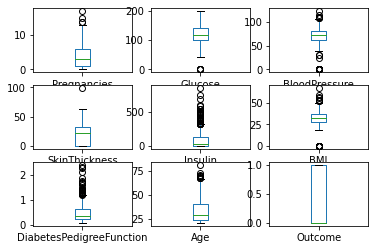

In [16]:
# box and whisker plots
df_data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

Multivariate plot

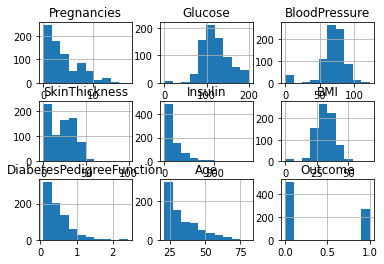

In [17]:
# histograms
df_data.hist()
pyplot.show()

## Multivariate plot

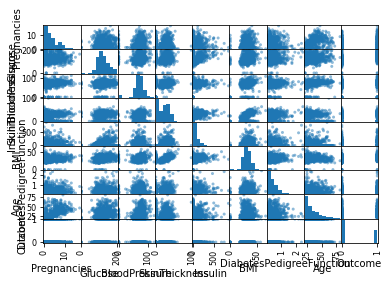

In [18]:
# scatter plot matrix
scatter_matrix(df_data)
pyplot.show()

## Point Biserial correlation
A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. Point-biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y.

In [29]:
import scipy.stats as stats
#calculate point-biserial correlation
stats.pointbiserialr(df_data.Outcome, df_data.Pregnancies)

PointbiserialrResult(correlation=0.22189815303398652, pvalue=5.065127298051825e-10)

In [28]:
stats.pointbiserialr(df_data.Pregnancies, df_data.Outcome)

In [ ]:
##The point-biserial correlation coefficient is 0.222 and the corresponding p-value is 0.5.0651e-10.
Since the correlation coefficient is positive, 
this indicates that when the variable x takes on the value “1” that the variable y tends to take on higher values compared to when the variable x takes on the value “0.”
Since the p-value of this correlation is not less than .05, this correlation is not statistically significant. 

In [22]:
stats.pointbiserialr(df_data.Age, df_data.Outcome)

PointbiserialrResult(correlation=0.2383559830271976, pvalue=2.2099754606646917e-11)

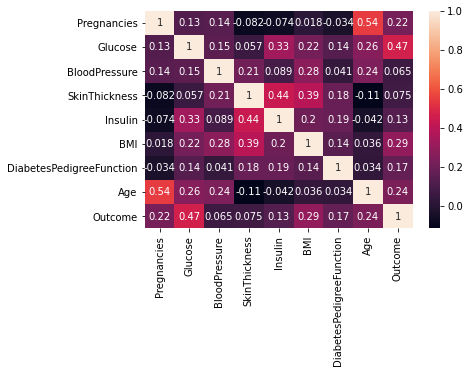

In [25]:
sns.heatmap(df_data.corr(),annot=True);